In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics

E:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
E:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from sklearn.cross_validation import cross_val_score

In [3]:
dta = sm.datasets.fair.load_pandas().data

In [5]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [6]:
dta['affair'] = (dta.affairs > 0).astype(int)

In [17]:
dta.shape

(6366, 10)

In [8]:
dta.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [9]:
dta.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


In [10]:
%matplotlib  inline

Text(0,0.5,'Frequency')

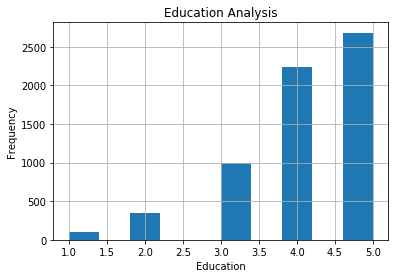

In [16]:
dta.rate_marriage.hist()
plt.title("Education Analysis")
plt.xlabel('Education')
plt.ylabel('Frequency')


In [18]:
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + \
religious + educ + C(occupation) + C(occupation_husb)',dta, return_type="dataframe")

In [21]:
X.head()

,Intercept,C(occupation)[T.2.0],C(occupation)[T.3.0],C(occupation)[T.4.0],C(occupation)[T.5.0],C(occupation)[T.6.0],C(occupation_husb)[T.2.0],C(occupation_husb)[T.3.0],C(occupation_husb)[T.4.0],C(occupation_husb)[T.5.0],C(occupation_husb)[T.6.0],rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [22]:
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [26]:
y = np.ravel(y)

In [27]:
y

array([1., 1., 1., ..., 0., 0., 0.])

In [28]:
model=LogisticRegression()

In [30]:
model = model.fit(X,y)

In [32]:
model.score(X,y)

0.7258875274897895

In [ ]:
# Model predict 73 % does not have affairs

In [33]:
y.mean()

0.3224945020420987

In [ ]:
# Only 32% have affairs so 68% does not have affairs, so our model pred is very close.

In [36]:
X.columns

Index(['Intercept', 'occ_2', 'occ_3', 'occ_4', 'occ_5', 'occ_6', 'occ_husb_2',
       'occ_husb_3', 'occ_husb_4', 'occ_husb_5', 'occ_husb_6', 'rate_marriage',
       'age', 'yrs_married', 'children', 'religious', 'educ'],
      dtype='object')

In [35]:
np.transpose(model.coef_)

array([[ 1.48983614],
       [ 0.18806662],
       [ 0.49894821],
       [ 0.25066862],
       [ 0.83900826],
       [ 0.83390874],
       [ 0.19063539],
       [ 0.29783211],
       [ 0.16140829],
       [ 0.1877703 ],
       [ 0.19401565],
       [-0.70312186],
       [-0.05841792],
       [ 0.10567661],
       [ 0.01691949],
       [-0.37113579],
       [ 0.00401623]])

In [37]:
x_train,x_test,y_train,y_test = train_test_split(X, y,test_size=0.3, random_state = 0 )

In [47]:
print(len(x_test))
print(len(x_train))
print(len(y_test))
print(len(y_train))

1910
4456
1910
4456


In [38]:
model2 = LogisticRegression()

In [39]:
model2.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [41]:
predicted = model2.predict(x_test)
predicted

array([1., 0., 0., ..., 0., 0., 0.])

In [42]:
predicted.shape

(1910,)

In [48]:
#probabilities
proba = model2.predict_proba(x_test)
proba

array([[0.35146338, 0.64853662],
       [0.90955084, 0.09044916],
       [0.72567333, 0.27432667],
       ...,
       [0.55727384, 0.44272616],
       [0.81207045, 0.18792955],
       [0.74734602, 0.25265398]])

In [49]:
proba.shape

(1910, 2)

In [52]:
print(metrics.accuracy_score(y_test,predicted))

0.7298429319371728


In [57]:
print(metrics.roc_auc_score(y_test,proba[:,1]))

0.745950606950631


In [68]:
print(metrics.confusion_matrix(y_test,predicted))

[[1169  134]
 [ 382  225]]


In [69]:
print(metrics.classification_report(y_test,predicted))

             precision    recall  f1-score   support

        0.0       0.75      0.90      0.82      1303
        1.0       0.63      0.37      0.47       607

avg / total       0.71      0.73      0.71      1910



In [71]:
scores = cross_val_score(LogisticRegression(), X,y,scoring='accuracy',cv=10)
scores

array([0.72100313, 0.70219436, 0.73824451, 0.70597484, 0.70597484,
       0.72955975, 0.7327044 , 0.70440252, 0.75157233, 0.75      ])

In [73]:
scores.mean()

0.7241630685514876